# Data Science notebook example

Welcome! Let's import some data and do some light analysis. Let's talk Pokémon. Pokémon is the history of a homeless preteen addicted to cockfighting. Despite the dark nature of the history, it's enjoyed by many people around the world –children and adults alike. Some nerds have compiled the data in a public github repo!

## Initial stuff

We'll begin by importing the `csv` and  `requests` library and we'll get some data from the repo.

In [1]:
%matplotlib inline

import csv
import requests

CSV_URL = 'https://raw.githubusercontent.com/veekun/pokedex/master/pokedex/data/csv/pokemon.csv'

with requests.Session() as s:
    download = s.get(CSV_URL)

    decoded_content = download.content.decode('utf-8')

    content_reader = csv.reader(decoded_content.splitlines(), delimiter=',')
    pokemon_list = list(content_reader)
    # print(pokemon_list)

Now we have a nested array with pokemon properties. Let's just plot some properties against each other.

First we'll need a visualization library. I favor seaborn.

In [2]:
import seaborn

I also like to use `numpy` matrixes rather than pandas datasets.

In [3]:
import numpy as np

## Data processing

I'll put the 150 first Pokémon data into a matrix.

In [4]:
pokemon_matrix = np.array(pokemon_list[0:151])
print(pokemon_matrix)

[['id' 'identifier' 'species_id' ..., 'base_experience' 'order'
  'is_default']
 ['1' 'bulbasaur' '1' ..., '64' '1' '1']
 ['2' 'ivysaur' '2' ..., '142' '2' '1']
 ..., 
 ['148' 'dragonair' '148' ..., '147' '201' '1']
 ['149' 'dragonite' '149' ..., '270' '202' '1']
 ['150' 'mewtwo' '150' ..., '306' '203' '1']]


Let's take note of the variable names

In [5]:
variable_names = pokemon_matrix[0,:]
#print(variable_names)

And save the names for later. I might want to add a tooltip or something.

In [6]:
pokemon_names = pokemon_matrix[1:,1]
#print(pokemon_names)

The interesting data is all integers, so we have to take care of setting the dtype correctly:

In [7]:
pokemon_data = np.array(pokemon_matrix[1:,2:], dtype=int)

## Analysis and visualization

We can finally plot height vs weight, marginal histograms, kernel distribution fits, the Pearson R coefficient, a regression y ~ x and 95% confidence bands.

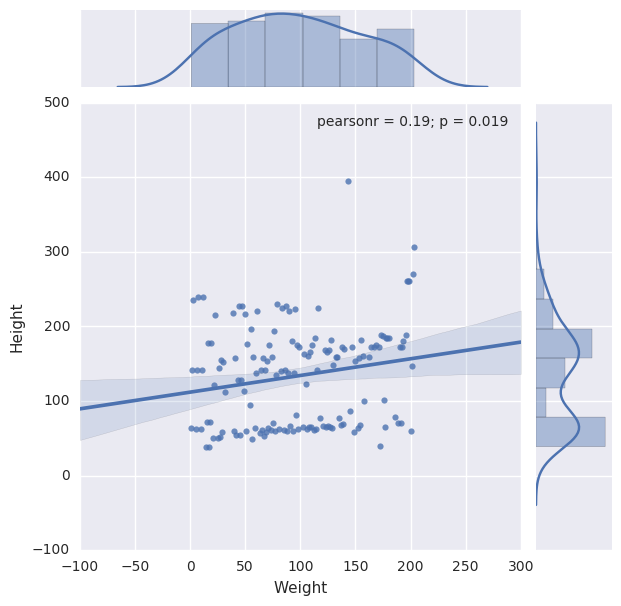

In [8]:
seaborn.jointplot(
    x = pokemon_data[:,4], # weight
    y = pokemon_data[:,3], # height
    kind="reg"
).set_axis_labels("Weight", "Height")